# Churn Modelling using machine learning

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')

## Display top 5 rows of dataset

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## check last 5 rows of the dataset

In [6]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## find shape of our dataset(number of rows & columns)

In [7]:
dataset.shape

(10000, 14)

In [8]:
print("Number of rows", dataset.shape[0])
print("Number of columns", dataset.shape[1])

Number of rows 10000
Number of columns 14


## Get Information about our dataset like total number rows,total number of columns,datatypes of each column & memory requirement

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## check null values in the dataset

In [10]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Get overall statistics about the dataset

In [11]:
dataset.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


## Dropping Irrelevent features

In [12]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'],axis = 1)

In [14]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding categorical data

In [15]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
dataset = pd.get_dummies(dataset,drop_first = True)

In [17]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Not handling Imbalanced

In [18]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [19]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

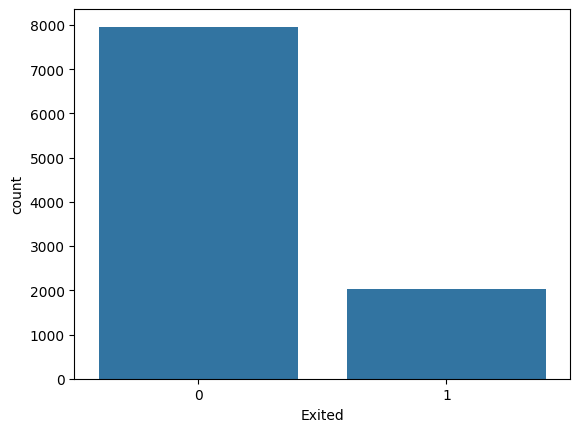

In [20]:
sns.countplot(x = dataset['Exited'])

In [21]:
x = dataset.drop('Exited',axis = 1)
y = dataset['Exited']

In [22]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


## Handling Dataset with help of Random Oversampling

In [23]:
from imblearn.over_sampling import RandomOverSampler
x_ros,y_ros = RandomOverSampler().fit_resample(x,y)
y_ros.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

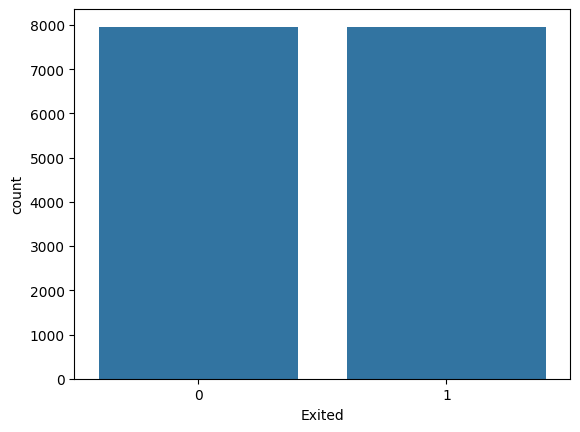

In [24]:
sns.countplot(x = y_ros)

## Splitting the dataset into training set & test set  

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size = 0.2, random_state = 52)

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
print(x_train)

[[ 0.55652815 -0.19479129  0.35346562 ... -0.65648939  1.80736752
   0.98767407]
 [ 0.65818791 -0.76241276  0.35346562 ... -0.65648939 -0.5532909
   0.98767407]
 [ 0.13972312 -1.80305212  1.38519437 ... -0.65648939 -0.5532909
  -1.01247975]
 ...
 [ 1.48163198 -0.00558414  0.69737521 ... -0.65648939 -0.5532909
  -1.01247975]
 [ 1.044495    0.65664091 -0.33435354 ... -0.65648939 -0.5532909
  -1.01247975]
 [-0.9175384  -0.85701634  1.72910395 ... -0.65648939 -0.5532909
   0.98767407]]


## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

## Predicting test set results

In [30]:
y_pred = classifier.predict(x_test)

In [31]:
x_test

array([[-1.45633514,  0.37283018,  1.38519437, ..., -0.65648939,
         1.80736752, -1.01247975],
       [ 0.09905922, -0.95161992, -1.0221727 , ..., -0.65648939,
         1.80736752, -1.01247975],
       [-1.70031856,  1.50807311,  1.38519437, ..., -0.65648939,
        -0.5532909 , -1.01247975],
       ...,
       [ 0.8310095 , -0.28939487, -1.70999186, ...,  1.52325386,
        -0.5532909 ,  0.98767407],
       [ 0.48536631, -1.0462235 , -0.33435354, ...,  1.52325386,
        -0.5532909 ,  0.98767407],
       [-0.79554668, -0.28939487, -1.36608228, ...,  1.52325386,
        -0.5532909 ,  0.98767407]])

In [32]:
print(y_pred)

[1 0 1 ... 1 0 1]


In [33]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7074701820464532

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [36]:
precision_score(y_test,y_pred)

0.7202753441802253

In [37]:
recall_score(y_test,y_pred)

0.7035452322738386

In [38]:
f1_score(y_test,y_pred)

0.7118119975262832

## SVC(Support Vector Classification)

In [39]:
from sklearn import svm

In [40]:
svm = svm.SVC()

In [41]:
svm.fit(x_train,y_train)

SVC()

In [42]:
y_pred1 = svm.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred1)

0.807909604519774

In [44]:
precision_score(y_test, y_pred1)

0.8172242874845105

## K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred2 = knn.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred2)

0.8286252354048964

In [50]:
precision_score(y_test,y_pred2)

0.7914438502673797

## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier()

In [53]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred3 = dt.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred3)

0.923728813559322

In [56]:
precision_score(y_test,y_pred3)

0.8837465564738292

## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier()

In [59]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
y_pred4 = rf.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred4)

0.9526051475204017

In [62]:
precision_score(y_test,y_pred4)

0.9329446064139941

## Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)


GradientBoostingClassifier()

In [64]:
y_pred5 = gbc.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred5)

0.8013182674199624

In [66]:
precision_score(y_test,y_pred5)

0.8208573256557902

In [67]:
final_dataset = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
                              'ACC':[accuracy_score(y_test,y_pred),
                                     accuracy_score(y_test,y_pred1),
                                     accuracy_score(y_test,y_pred2),
                                     accuracy_score(y_test,y_pred3),
                                     accuracy_score(y_test,y_pred4),
                                     accuracy_score(y_test,y_pred5)]})

In [68]:
final_dataset

,Models,ACC
0,LR,0.707470
1,SVC,0.807910
2,KNN,0.828625
3,DT,0.923729
4,RF,0.952605
5,GB,0.801318


In [69]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

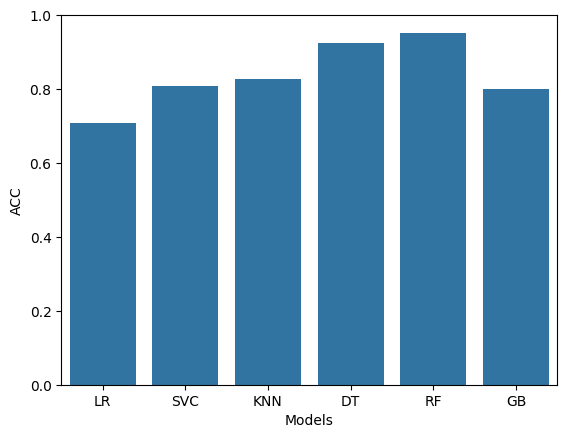

In [70]:
sns.barplot(final_dataset,x='Models',y='ACC')

In [71]:
final_dataset = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
                              'PRE':[precision_score(y_test,y_pred),
                                     precision_score(y_test,y_pred1),
                                     precision_score(y_test,y_pred2),
                                     precision_score(y_test,y_pred3),
                                     precision_score(y_test,y_pred4),
                                     precision_score(y_test,y_pred5)]})

In [72]:
final_dataset

,Models,PRE
0,LR,0.720275
1,SVC,0.817224
2,KNN,0.791444
3,DT,0.883747
4,RF,0.932945
5,GB,0.820857


<Axes: xlabel='Models', ylabel='PRE'>

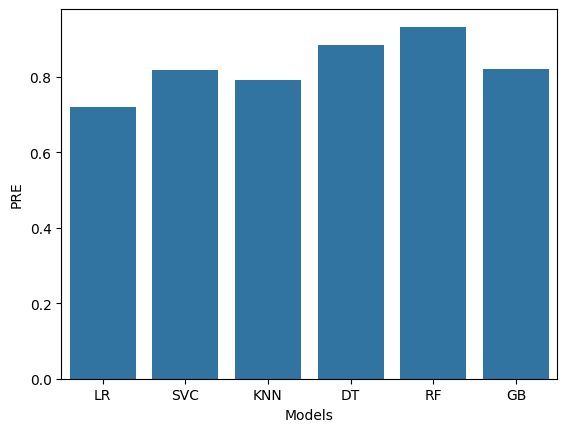

In [73]:
sns.barplot(final_dataset,x = 'Models',y ='PRE')

# Save Model

In [74]:
x_ros = sc.fit_transform(x_ros)

In [75]:
rf.fit(x_ros,y_ros)

RandomForestClassifier()

In [76]:
import joblib

In [77]:
joblib.dump(rf,'churn_prediction_model')

['churn_prediction_model']

In [78]:
model = joblib.load('churn_prediction_model')

In [79]:
dataset.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [80]:
model.predict([[619,42,2,0,0,0,0,101348.88,0,0,0]])

array([0])